<a href="https://colab.research.google.com/github/Danny2Forever/My-Datascience/blob/main/steam/steam_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
from natsort import index_natsorted

df = pd.read_csv("steam-200k.csv")
# df = df[:100] # Restrict value for easy to run
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df

There are 200000 rows and 5 columns


,User ID,Name of the steam game,behavior name (purchase/play),"Hours if behavior is play, 1.0 if behavior is purchase",none
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [143]:
game_name = df[df['behavior name (purchase/play)'] != "purchase"]
game_name = game_name.drop_duplicates(subset=['Name of the steam game'])


game_dict = {'Name':[],'Hours of play':[]}

for j in game_name['Name of the steam game']:
  game = df[df['Name of the steam game'] == j]
  game_dict['Name'].append(j)
  game[game['behavior name (purchase/play)'] != "purchase"]
  sum_hours = game['Hours if behavior is play, 1.0 if behavior is purchase'].sum()
  game_dict['Hours of play'].append(sum_hours)

game_name['total_hours'] = game_dict['Hours of play']
game_name = game_name.sort_values(
                      by="total_hours",
                      ascending=False,
                      key=lambda x: np.argsort(index_natsorted(game_name["total_hours"])))

game_name

,User ID,Name of the steam game,behavior name (purchase/play),"Hours if behavior is play, 1.0 if behavior is purchase",none,total_hours
43,151603712,Dota 2,play,0.5,0,986525.6
97,59945701,Counter-Strike Global Offensive,play,2.3,0,324183.6
19,151603712,Team Fortress 2,play,2.8,0,175996.3
1097,30695285,Counter-Strike,play,0.2,0,135117.1
75,59945701,Sid Meier's Civilization V,play,22.0,0,100417.3
...,...,...,...,...,...,...
44127,100351493,CRYENGINE,play,0.1,0,1.1
29600,11403772,Formula Fusion,play,0.1,0,1.1
18730,95137775,Final Hours of Titanfall,play,0.1,0,1.1
5069,215540943,Urizen Shadows of the Cold,play,0.1,0,1.1


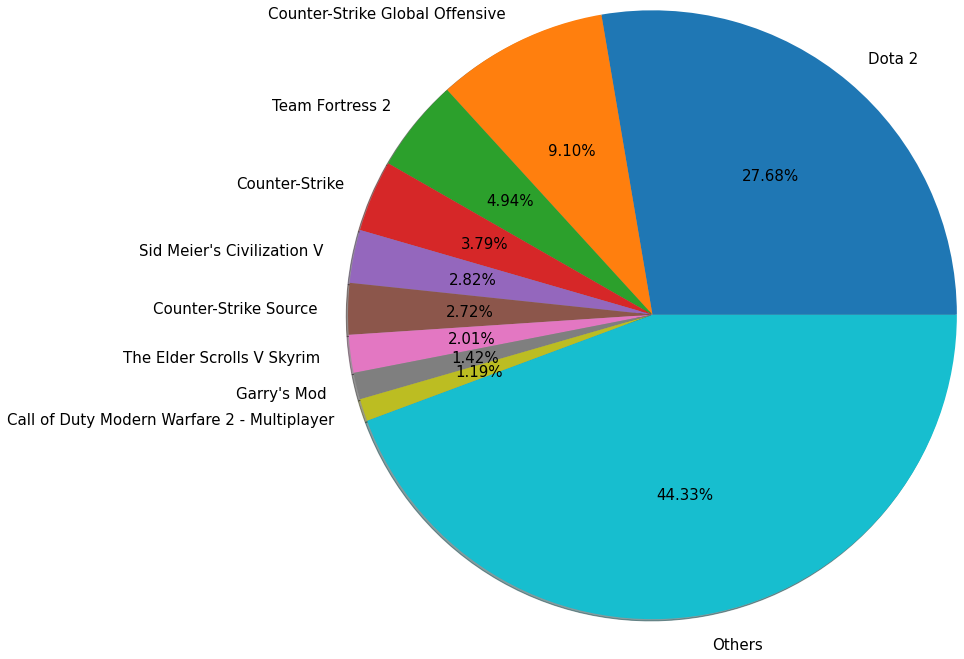

In [145]:
import matplotlib.pyplot as plt
y = []
lb = []

for k in game_name["total_hours"][:9]:
  y.append(k)
   
for l in game_name["Name of the steam game"][:9]:
  lb.append(l)

y.append(game_name["total_hours"][9:].sum())
lb.append("Others") 
textprops = {"fontsize":15} # Font size of text in pie chart
 
plt.pie(y, # Values
        labels = lb,
        autopct = "%0.2f%%",
        shadow = True,
        radius = 3.5,
        startangle = 0, 
        textprops =textprops) 

plt.show()
